In [8]:
import itertools
import logging

import click
import numpy
import pandas
import scipy
import scipy.spatial

In [9]:
import scipy.stats

In [10]:
import matplotlib.pyplot as plt

In [11]:
import glob

In [100]:
files = [x for x in glob.glob("/Users/simondi/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-transformed-clusters/*") if x.endswith("tsv")]

In [101]:
tables = [None] * len(files)
for i, fl in enumerate(files):
    tables[i] = pandas.read_csv(
          fl, sep="\t", nrows=1000,
          usecols=lambda x: x.startswith("f_") or x.startswith("pred"))
df = pandas.concat(tables)

In [102]:
def _mean_distance(it, current_idx, df):
    distances = scipy.spatial.distance.cdist(
      df[df.prediction == current_idx].filter(regex="f_\d+").values,
      df[df.prediction == it].filter(regex="f_\d+").values)
    return numpy.mean(distances, axis=1)

In [103]:
def _mp_min_distance(self, current_idx, K, mat):
    itr = numpy.array([j for j in range(K) if j != current_idx])
    distances = [self._mean_distance(it, current_idx, mat) for it in itr]
    distances = numpy.vstack(distances).T
    argmins = numpy.argmin(distances, axis=1)
    min_distances = numpy.min(distances, axis=1)
    arg = itr[argmins]
    return arg, min_distances

In [104]:
def _compute_silhouette(self, current_idx, K, mat):
    min_cluster, min_distance = self._mp_min_distance(current_idx, K, mat)
    within_distance = self._mean_distance(current_idx, current_idx, mat)
    silhouette = (min_distance - within_distance) / \
                  numpy.maximum(min_distance, within_distance)
    return zip(itertools.repeat(current_idx, len(min_cluster)),
               min_cluster,
               silhouette)

In [107]:
s =  (self._compute_silhouette(c, len(files), mat) for c in range(len(files)))

In [2]:
fl = "/Users/simondi/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-transformed-silhouettes.tsv"

In [3]:
p = pandas.read_csv(fl, sep="\t")

In [4]:
p.loc[:5,:]

,cluster,neighbor,silhouette
0,0,3,0.356017
1,0,9,0.118037
2,0,9,0.165585
3,0,9,0.099604
4,0,7,-0.040370
5,0,9,0.108966


In [12]:
import numpy

In [13]:
hist = numpy.histogram(p["silhouette"].values, bins=100, density=True)

In [14]:
hist

(array([3.66809573, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.66809573, 1.83404787, 3.66809573, 1.83404787, 1.83404787,
        0.        , 0.        , 0.        , 0.        , 3.66809573,
        1.83404787, 0.        , 0.        , 3.66809573, 1.83404787,
        3.66809573, 3.66809573, 3.66809573, 1.83404787, 3.66809573,
        0.        , 0.        , 3.66809573, 1.83404787, 1.83404787,
        0.        , 5.5021436 , 3.66809573, 1.83404787, 3.66809573,
        3.66809573, 7.33619147, 5.5021436 , 0.        , 1.83404787,
        1.83404787, 3.66809573, 3.66809573, 3.66809573, 1.83404787,
        1.83404787, 1.83404787, 1.83404787, 3.66809573, 5.5021436 ,
        0.        , 3.66809573, 3.66809573, 5.5021436 , 1.83404787,
        1.83404787, 0.        , 7.33619147, 0.        , 5.5021436 ,
        0.        , 0.        , 3.66809573, 1.83404787, 0.        ,
        1.83404787, 9.17023934, 3.66809573, 0.  

In [15]:
mids = numpy.zeros(len(hist[0]))
widths = numpy.zeros(len(hist[0]))
for i in range(len(mids)):
    mids[i] = (hist[1][i] + hist[1][i + 1]) / 2
    widths[i] = numpy.abs(hist[1][i] - hist[1][i + 1])

In [16]:
mids

array([-0.03764333, -0.03219091, -0.02673849, -0.02128607, -0.01583365,
       -0.01038123, -0.00492881,  0.00052361,  0.00597603,  0.01142845,
        0.01688087,  0.02233329,  0.02778571,  0.03323813,  0.03869055,
        0.04414297,  0.04959539,  0.05504781,  0.06050023,  0.06595266,
        0.07140508,  0.0768575 ,  0.08230992,  0.08776234,  0.09321476,
        0.09866718,  0.1041196 ,  0.10957202,  0.11502444,  0.12047686,
        0.12592928,  0.1313817 ,  0.13683412,  0.14228654,  0.14773896,
        0.15319138,  0.1586438 ,  0.16409622,  0.16954864,  0.17500106,
        0.18045348,  0.1859059 ,  0.19135832,  0.19681074,  0.20226317,
        0.20771559,  0.21316801,  0.21862043,  0.22407285,  0.22952527,
        0.23497769,  0.24043011,  0.24588253,  0.25133495,  0.25678737,
        0.26223979,  0.26769221,  0.27314463,  0.27859705,  0.28404947,
        0.28950189,  0.29495431,  0.30040673,  0.30585915,  0.31131157,
        0.31676399,  0.32221641,  0.32766883,  0.33312125,  0.33

In [17]:
(hist[1][:-2] + hist[1][1:-1]) / 2

array([-0.03764333, -0.03219091, -0.02673849, -0.02128607, -0.01583365,
       -0.01038123, -0.00492881,  0.00052361,  0.00597603,  0.01142845,
        0.01688087,  0.02233329,  0.02778571,  0.03323813,  0.03869055,
        0.04414297,  0.04959539,  0.05504781,  0.06050023,  0.06595266,
        0.07140508,  0.0768575 ,  0.08230992,  0.08776234,  0.09321476,
        0.09866718,  0.1041196 ,  0.10957202,  0.11502444,  0.12047686,
        0.12592928,  0.1313817 ,  0.13683412,  0.14228654,  0.14773896,
        0.15319138,  0.1586438 ,  0.16409622,  0.16954864,  0.17500106,
        0.18045348,  0.1859059 ,  0.19135832,  0.19681074,  0.20226317,
        0.20771559,  0.21316801,  0.21862043,  0.22407285,  0.22952527,
        0.23497769,  0.24043011,  0.24588253,  0.25133495,  0.25678737,
        0.26223979,  0.26769221,  0.27314463,  0.27859705,  0.28404947,
        0.28950189,  0.29495431,  0.30040673,  0.30585915,  0.31131157,
        0.31676399,  0.32221641,  0.32766883,  0.33312125,  0.33

In [229]:
widths

array([0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545

In [234]:
numpy.diff(hist[1], 1)

array([0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545242,
       0.00545242, 0.00545242, 0.00545242, 0.00545242, 0.00545

In [18]:
neg_idx = numpy.where(mids <= 0)[0]
pos_idx = numpy.where(mids > 0)[0]

In [19]:
scores = numpy.append(mids[numpy.ix_(neg_idx)], mids[numpy.ix_(pos_idx)])
freqs = numpy.append(-hist[0][numpy.ix_(neg_idx)], hist[0][numpy.ix_(pos_idx)])
trends = numpy.append(numpy.repeat("#464C72FF", len(neg_idx)), numpy.repeat( "#5E988BFF", len(pos_idx)))

In [ ]:
"#464C72FF"

In [199]:
p = pandas.DataFrame({"Score": scores, "Frequency": freqs, "Trend": trends})

No handles with labels found to put in legend.


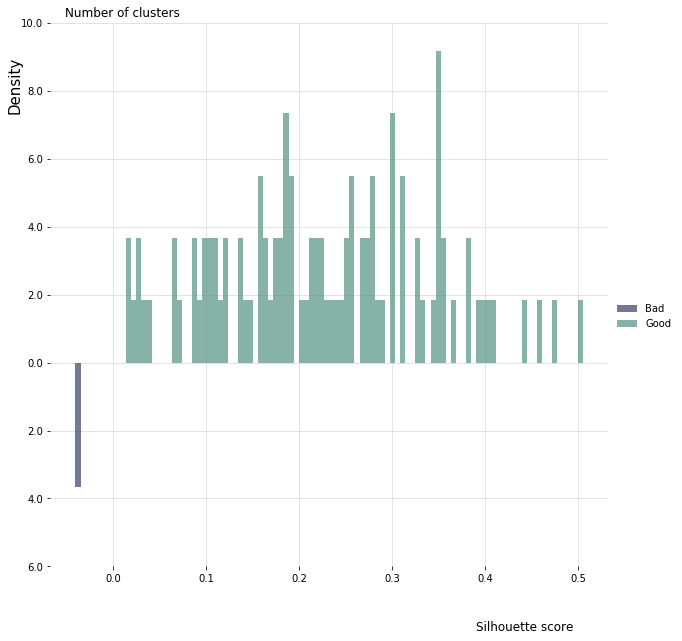

In [107]:

_, ax = plt.subplots(figsize=(10, 10))
for i in ["top", "bottom", "left", "right"]:
    ax.spines[i].set_visible(False)
ax.xaxis.set_label_coords(x=.85, y=-0.1)
ax.yaxis.set_label_coords(x=-0.05, y=.885)
ax.grid(which="major", axis="both", linestyle="-", color="gainsboro")
ax.legend(frameon=False, loc='lower center', ncol=2)
ax.set_axisbelow(True)
plt.bar(mids[numpy.ix_(neg_idx)], 
        -hist[0][numpy.ix_(neg_idx)],
        width=widths[numpy.ix_(neg_idx)], 
        color="#464C72FF", alpha=.75)
plt.bar(mids[numpy.ix_(pos_idx)], 
        hist[0][numpy.ix_(pos_idx)],
        width=widths[numpy.ix_(pos_idx)], 
        color="#5E988BFF", alpha=.75)
locs, labels = plt.yticks()
plt.yticks(locs, numpy.abs(locs))
plt.xlabel("Silhouette score", fontsize=12)
plt.ylabel("Density", fontsize=15)
plt.title("Number of clusters", x=0.13, fontsize=12)
plt.legend(["Bad", "Good"], loc=2, bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

In [108]:
map(lambda x: , numpy.abs(locs))

array([ 6.,  4.,  2.,  0.,  2.,  4.,  6.,  8., 10.])

In [90]:
sprint

-6.0

In [83]:
s.get_position()[1]

-6.0

In [85]:
list(labels)

[Text(0,-6,'−6'),
 Text(0,-4,'−4'),
 Text(0,-2,'−2'),
 Text(0,0,'0'),
 Text(0,2,'2'),
 Text(0,4,'4'),
 Text(0,6,'6'),
 Text(0,8,'8'),
 Text(0,10,'10')]